In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
FULL_PATH = 'C:\\Users\\caval\\Documents\\tech-challenge-01'
DOLAR_PRICE = 4.79

In [5]:
italian_quality = pd.read_csv(f'{FULL_PATH}\\content\\italian_wines_2_scores.csv')
french_quality = pd.read_csv(f'{FULL_PATH}\\content\\french_wines_2_scores.csv')
spanish_quality = pd.read_csv(f'{FULL_PATH}\\content\\spanish_wines_2_scores.csv')
brazilian_quality = pd.read_csv(f'{FULL_PATH}\\content\\brazilian_wine_scores.csv')

In [6]:
display(italian_quality.head())
display(french_quality.head())
display(spanish_quality.head())
display(brazilian_quality.head())

,product,grape,score,avg_price_liter
0,"Tenuta San Guido Sassicaia Bolgheri, Tuscany",Cabernet Franc - Cabernet Sauvignon,95.0,1081.33
1,"Marchesi Antinori Tignanello Toscana IGT, Tus...",Cabernet - Sangiovese,94.0,1253.33
2,"Ornellaia Bolgheri Superiore, Tuscany",Bordeaux Blend Red,94.0,397.33
3,"Masseto Toscana IGT, Tuscany",Merlot,96.0,150.67
4,"Marchesi Antinori Solaia Toscana IGT, Tuscany",Cabernet - Sangiovese,95.0,1222.67


,product,grape,score,avg_price_liter
0,"Chateau Mouton Rothschild, Pauillac",Bordeaux Blend Red,96.0,789.33
1,"Dom Perignon Brut, Champagne,",Champagne Blend,94.0,529.33
2,"Chateau Lafite Rothschild, Pauillac",Bordeaux Blend Red,96.0,1170.67
3,"Petrus, Pomerol",Merlot,96.0,1321.33
4,"Chateau Margaux, Margaux",Bordeaux Blend Red,96.0,1102.67


,product,grape,score,avg_price_liter
0,"Vega Sicilia Unico Gran Reserva, Ribera del D...",Tempranillo,95.0,622.67
1,"Bodegas Zugober Belezos 50/50, Rioja DOCa",Rioja Red Blend,88.0,74.67
2,"R. Lopez de Heredia Vina Tondonia Reserva, Ri...",Rioja Red Blend,93.0,346.67
3,"La Rioja Alta S.A. Gran Reserva 904, Rioja DOCa",Rioja Red Blend,93.0,536.00
4,Marques de Murrieta Castillo Ygay Gran Reserv...,Rioja Red Blend,93.0,93.33


,product,grape,score,avg_price_liter
0,Vinicola Campestre 'Pergola' Tinto de Mesa Se...,Red Blend,NaN,24.00
1,"Lidio Carraro Grande Vindima Merlot, Encruzil...",Merlot,90.0,384.00
2,"Vinicola Campestre 'Zanotto' Sangiovese, Camp...",Sangiovese,95.0,98.67
3,"Lidio Carraro Grande Vindima Tannat, Encruzil...",Tannat,90.0,645.33
4,"Peterlongo 'Elegance' Blanc de Blancs Brut, R...",Chardonnay,88.0,212.00


In [7]:
french_quality['avg_price_liter'] = french_quality['avg_price_liter'] / DOLAR_PRICE
italian_quality['avg_price_liter'] = italian_quality['avg_price_liter'] / DOLAR_PRICE
spanish_quality['avg_price_liter'] = spanish_quality['avg_price_liter'] / DOLAR_PRICE
brazilian_quality['avg_price_liter'] = brazilian_quality['avg_price_liter'] / DOLAR_PRICE

In [8]:
brazilian_quality['score'] = brazilian_quality['score'].fillna(brazilian_quality['score'].mean())
spanish_quality['score'] = spanish_quality['score'].fillna(spanish_quality['score'].mean())
italian_quality['score'] = italian_quality['score'].fillna(italian_quality['score'].mean())
french_quality['score'] = french_quality['score'].fillna(french_quality['score'].mean())


In [10]:
median_wines = (
    [
        french_quality['score'].mean(numeric_only=True).round(1),
        french_quality['avg_price_liter'].mean(numeric_only=True).round(2),
    ],
    [
        italian_quality['score'].mean(numeric_only=True).round(1),
        italian_quality['avg_price_liter'].mean(numeric_only=True).round(2),
    ],
    [
        brazilian_quality['score'].mean(numeric_only=True).round(1),
        brazilian_quality['avg_price_liter'].mean(numeric_only=True).round(2),
    ],
    [
        spanish_quality['score'].mean(numeric_only=True).round(1),
        spanish_quality['avg_price_liter'].mean(numeric_only=True).round(2)
    ]
)

median_wines

([92.6, 125.08], [91.8, 106.22], [88.3, 30.29], [90.7, 64.77])

In [11]:
df = pd.DataFrame(median_wines, index=['França', 'Itália', 'Brazil', 'Espanha'], columns=['score', 'avg_price_liter'])
df

,score,avg_price_liter
França,92.6,125.08
Itália,91.8,106.22
Brazil,88.3,30.29
Espanha,90.7,64.77


In [12]:
df.reset_index()

,index,score,avg_price_liter
0,França,92.6,125.08
1,Itália,91.8,106.22
2,Brazil,88.3,30.29
3,Espanha,90.7,64.77


In [13]:
df.reset_index(inplace=True)

In [14]:
df

,index,score,avg_price_liter
0,França,92.6,125.08
1,Itália,91.8,106.22
2,Brazil,88.3,30.29
3,Espanha,90.7,64.77


In [15]:
df.columns = ['country', 'score', 'avg_price_liter']

In [16]:
df

,country,score,avg_price_liter
0,França,92.6,125.08
1,Itália,91.8,106.22
2,Brazil,88.3,30.29
3,Espanha,90.7,64.77


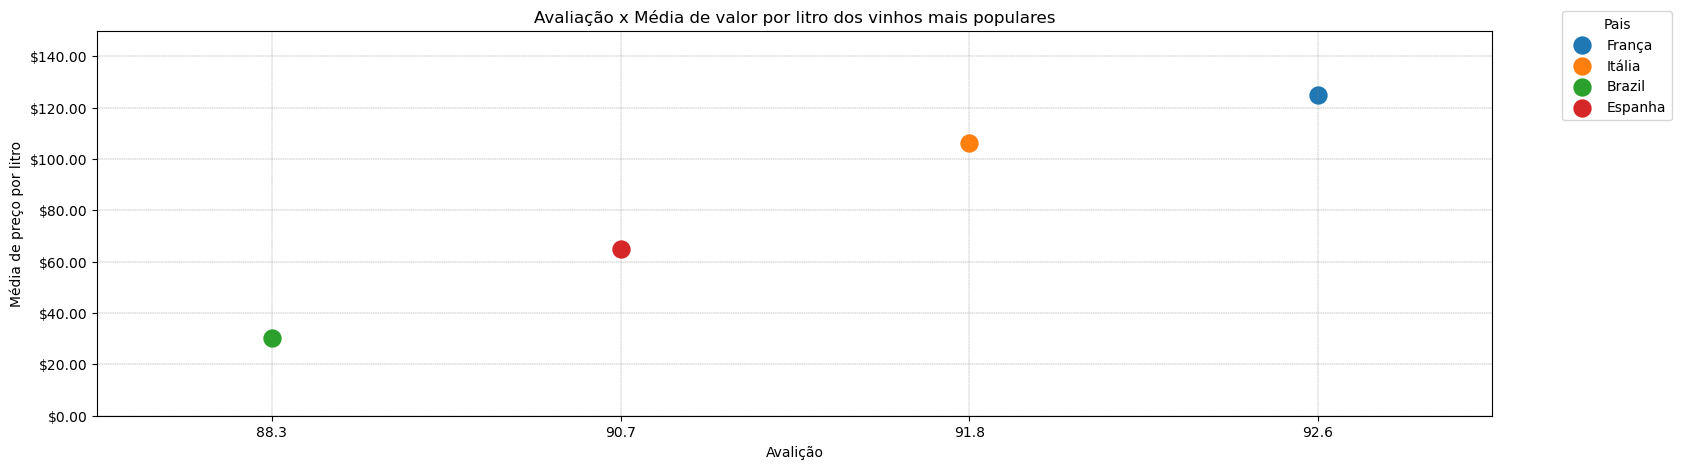

In [42]:
plt.figure(figsize=(18,5))
ax = sns.pointplot(data=df, x='score', y='avg_price_liter', hue='country', scale=1.5)
ax.set_ylabel("Média de preço por litro")
ax.set_xlabel("Avalição")
ax.set_title("Avaliação x Média de valor por litro dos vinhos mais populares")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}"))
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0, title="Pais")
plt.ylim(0, 150)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

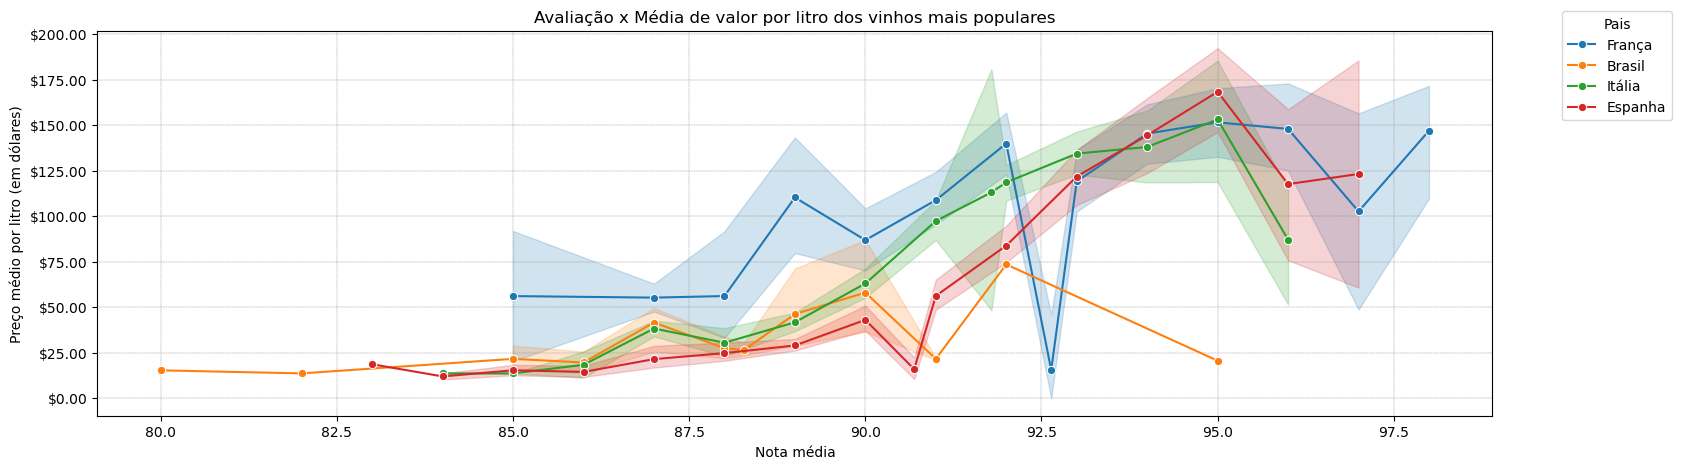

In [40]:
plt.figure(figsize=(18,5))
ax = sns.lineplot(data=french_quality, y='avg_price_liter', x='score', label='França', marker='o')
ax = sns.lineplot(data=brazilian_quality, y='avg_price_liter', x='score', label='Brasil', marker='o')
ax = sns.lineplot(data=italian_quality, y='avg_price_liter', x='score', label='Itália', marker='o')
ax = sns.lineplot(data=spanish_quality, y='avg_price_liter', x='score', label='Espanha', marker='o')
ax.yaxis.set_label_text("Preço médio por litro (em dólares)")
ax.xaxis.set_label_text("Nota média")
ax.set_title("Avaliação x Média de valor por litro dos vinhos mais populares")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}"))
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0, title="Pais")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()